# <span style="color: #FF0000"> **_Football Data Analyze_** </span>

**_The Goal of this project is to be able to find the result of the match that I want. For that, i will have to use Machine Learning and Python_**

Library

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import datetime
import gc
import seaborn as sns
gc.collect()


0

Opening of the csv files

In [2]:
games = pd.read_csv(r'C:\Users\spoti\Downloads\archive\games.csv')
appearances = pd.read_csv(r'C:\Users\spoti\Downloads\archive\appearances.csv')
club_games = pd.read_csv(r'C:\Users\spoti\Downloads\archive\club_games.csv')
clubs = pd.read_csv(r'C:\Users\spoti\Downloads\archive\clubs.csv')
competitions = pd.read_csv(r'C:\Users\spoti\Downloads\archive\competitions.csv')
game_events = pd.read_csv(r'C:\Users\spoti\Downloads\archive\game_events.csv')
game_lineups = pd.read_csv(r'C:\Users\spoti\Downloads\archive\game_lineups.csv')
player_valuations = pd.read_csv(r'C:\Users\spoti\Downloads\archive\player_valuations.csv')
players = pd.read_csv(r'C:\Users\spoti\Downloads\archive\players.csv')

Global variables

In [3]:
annee = int(2023)
date = "2023-08-11"


Fonction declaration

In [4]:
def most_frequent(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

def calculer_age(date_naissance):
    
    date_naissance = datetime.datetime.strptime(date_naissance, "%d %m %Y").date()
    date_du_jour = datetime.date.today()
    difference = date_du_jour - date_naissance
    age = difference.days // 365
    
    return age

## **1 - Informations about the competition**

        _Choice of the competition_     

In [5]:
liste_ligue = []

for i in range(len(games)):
    nom_ligue= str(games.loc[i, "competition_id"])
    
    if nom_ligue not in liste_ligue:
        liste_ligue.append(nom_ligue)

liste_ligue = sorted(liste_ligue)
print(liste_ligue)

ligue = (input("Choix de la ligue à analyser :"))
ligue = ligue.upper()

if ligue not in liste_ligue:
    print("ERREUR, LIGUE INCONNUE")

if ligue in liste_ligue:
    for i in range(len(competitions)):
        if str(competitions.iloc[i,0])==ligue:
            print("La ligue choisie est :",competitions.loc[i,"competition_code"])

['BE1', 'BESC', 'CDR', 'CGB', 'CIT', 'CL', 'CLQ', 'DFB', 'DFL', 'DK1', 'DKP', 'ECLQ', 'EL', 'ELQ', 'ES1', 'FAC', 'FR1', 'FRCH', 'GB1', 'GBCS', 'GR1', 'GRP', 'IT1', 'KLUB', 'L1', 'NL1', 'NLP', 'NLSC', 'PO1', 'POCP', 'POSU', 'RU1', 'RUP', 'RUSS', 'SC1', 'SCI', 'SFA', 'SUC', 'TR1', 'UKR1', 'UKRP', 'UKRS', 'USC']
La ligue choisie est : premier-league


        _Display of league teams_    

In [6]:
equipe_ligue = []

for i in range(len(clubs)):
    if clubs.loc[i, "domestic_competition_id"] == ligue and clubs.loc[i, "last_season"] == annee:
        equipe_ligue.append(clubs.iloc[i, 2])
        
equipe_ligue = sorted(equipe_ligue)
print(equipe_ligue)

['Arsenal Football Club', 'Association Football Club Bournemouth', 'Aston Villa Football Club', 'Brentford Football Club', 'Brighton and Hove Albion Football Club', 'Burnley Football Club', 'Chelsea Football Club', 'Crystal Palace Football Club', 'Everton Football Club', 'Fulham Football Club', 'Liverpool Football Club', 'Luton Town Football Club', 'Manchester City Football Club', 'Manchester United Football Club', 'Newcastle United Football Club', 'Nottingham Forest Football Club', 'Sheffield United Football Club', 'Tottenham Hotspur Football Club', 'West Ham United Football Club', 'Wolverhampton Wanderers Football Club']


        _Standing_    

In [7]:
nombre_match_ligue = []
nombre_victoire_ligue = []
nombre_nul_ligue = []
nombre_defaite_ligue = []
nombre_buts_pour_ligue = []
nombre_buts_contre_ligue = []
difference_buts_ligue = []
nombre_points_ligue= []
tag_equipe_ligue = []
nombre_point_par_match = []

for i in equipe_ligue:

    x = v = n = d = p = bp = bc = tag = 0

    for j in range(len(clubs)):
        if clubs.loc[j,"name"] == i:   
            tag = clubs.loc[j,"club_id"]

    for j in range(len(games)):
        if games.loc[j,"competition_id"]==ligue and games.loc[j,"season"]==annee :
            
            if games.loc[j,"home_club_id"] == tag:
                x += 1
                bp += games.loc[j, "home_club_goals"]
                bc += games.loc[j, "away_club_goals"]
                if games.loc[j, "home_club_goals"] > games.loc[j, "away_club_goals"]:  
                    v += 1
                    p += 3
                elif games.loc[j, "home_club_goals"] == games.loc[j, "away_club_goals"]:  
                    n += 1
                    p += 1
                elif games.loc[j, "home_club_goals"] < games.loc[j, "away_club_goals"]:  
                    d += 1

            if games.loc[j,"away_club_id"] == tag:
                x += 1
                bp += games.loc[j, "away_club_goals"]
                bc += games.loc[j, "home_club_goals"]
                if games.loc[j, "home_club_goals"] < games.loc[j, "away_club_goals"]:  
                    v += 1
                    p += 3
                elif games.loc[j, "home_club_goals"] == games.loc[j, "away_club_goals"]:  
                    n += 1
                    p += 1
                elif games.loc[j, "home_club_goals"] > games.loc[j, "away_club_goals"]:  
                    d += 1

    tag_equipe_ligue.append(tag)
    nombre_match_ligue.append(x)
    nombre_victoire_ligue.append(v)
    nombre_nul_ligue.append(n)
    nombre_defaite_ligue.append(d)
    nombre_buts_pour_ligue.append(bp)
    nombre_buts_contre_ligue.append(bc)
    difference_buts_ligue.append(bp-bc)
    nombre_points_ligue.append(p)
    nombre_point_par_match.append(p/x)

triées = sorted(zip(nombre_points_ligue, tag_equipe_ligue, equipe_ligue, nombre_match_ligue, nombre_victoire_ligue, nombre_nul_ligue, nombre_defaite_ligue, nombre_buts_pour_ligue, nombre_buts_contre_ligue, difference_buts_ligue, nombre_point_par_match), reverse=True)
nombre_points_ligue, tag_equipe_ligue, equipe_ligue, nombre_match_ligue, nombre_victoire_ligue, nombre_nul_ligue, nombre_defaite_ligue, nombre_buts_pour_ligue, nombre_buts_contre_ligue, difference_buts_ligue, nombre_point_par_match = zip(*triées)

print("Nom equipe - Joués - V - N - D - BP - BC - Diff - Points\n")

for i in range(len(equipe_ligue)):
    print(i+1,"-",tag_equipe_ligue[i],"-",equipe_ligue[i],"-",nombre_match_ligue[i],nombre_victoire_ligue[i],nombre_nul_ligue[i],nombre_defaite_ligue[i],nombre_buts_pour_ligue[i],nombre_buts_contre_ligue[i],difference_buts_ligue[i],nombre_points_ligue[i],round(nombre_point_par_match[i],2)) 

# à modifier pour afficher un tableau propre et prévu pour

Nom equipe - Joués - V - N - D - BP - BC - Diff - Points

1 - 281 - Manchester City Football Club - 38 28 7 3 96 34 62 91 2.39
2 - 11 - Arsenal Football Club - 38 28 5 5 91 29 62 89 2.34
3 - 31 - Liverpool Football Club - 38 24 10 4 86 41 45 82 2.16
4 - 405 - Aston Villa Football Club - 38 20 8 10 76 61 15 68 1.79
5 - 148 - Tottenham Hotspur Football Club - 38 20 6 12 74 61 13 66 1.74
6 - 631 - Chelsea Football Club - 38 18 9 11 77 63 14 63 1.66
7 - 985 - Manchester United Football Club - 38 18 6 14 57 58 -1 60 1.58
8 - 762 - Newcastle United Football Club - 38 18 6 14 85 62 23 60 1.58
9 - 379 - West Ham United Football Club - 38 14 10 14 60 74 -14 52 1.37
10 - 873 - Crystal Palace Football Club - 38 13 10 15 57 58 -1 49 1.29
11 - 1237 - Brighton and Hove Albion Football Club - 38 12 12 14 55 62 -7 48 1.26
12 - 989 - Association Football Club Bournemouth - 38 13 9 16 54 67 -13 48 1.26
13 - 29 - Everton Football Club - 38 13 9 16 40 51 -11 48 1.26
14 - 931 - Fulham Football Club - 38 13

        _Team statistics_   

In [8]:
age_equipe_ligue = []
nombre_joueurs_ligue = []
valeur_joueurs_ligue = []
nationalite_joueurs_ligue = []

for i in range(len(tag_equipe_ligue)):

    nb_joueurs_etr = valeur_joueurs = age_total = nb_joueurs = 0
    for j in range(len(players)):

        if (tag_equipe_ligue[i] == players.loc[j,"current_club_id"]) and (players.loc[j,"last_season"] == annee):

            date_naissance_formattee = datetime.datetime.strptime(players.loc[j,"date_of_birth"], "%Y-%m-%d").strftime("%d %m %Y")
            age_total = age_total + (calculer_age(date_naissance_formattee))
            valeur_joueurs += players.loc[j,"market_value_in_eur"]
            nb_joueurs += 1

            if players.loc[j,"country_of_citizenship"] != "England" :
                nb_joueurs_etr += 1

    #age_equipe_ligue.append(age_total/nb_joueurs)
    nombre_joueurs_ligue.append(nb_joueurs)
    valeur_joueurs_ligue.append(int(valeur_joueurs)/1000000)
    nationalite_joueurs_ligue.append(nb_joueurs_etr)

    # à modifier pour afficher un tableau 


## **2 - Informations about the club**

        _Choice of the team_    

In [9]:
tag_equipe = input("Code de l'équipe à analyser :")
tag_equipe = int(tag_equipe)

for i in range(len(tag_equipe_ligue)):
    if int(tag_equipe) == tag_equipe_ligue[i]:
        equipe = equipe_ligue[i]
        break

print("L'équipe choisie est",equipe,"évoluant en",ligue)  

L'équipe choisie est Liverpool Football Club évoluant en GB1


        _Players in the selected team_    

In [10]:
tag_joueurs = []
nom_joueurs = []


for i in range(len(appearances)):
    tag = 0
    if (appearances.loc[i,"player_club_id"] == int(tag_equipe)) and (appearances.loc[i,"date"] > date):
        tag = (appearances.loc[i,"player_id"])

    if tag not in tag_joueurs:
        tag_joueurs.append(tag)

for i in range(len(tag_joueurs)):
    for j in range(len(players)):
        nom = 0
        if tag_joueurs[i] == players.loc[j,"player_id"]:
            nom = players.loc[j,"name"]
    
        if nom not in nom_joueurs:
            nom_joueurs.append(nom)

tag_joueurs.pop(0)
nom_joueurs.pop(0)

triées = sorted(zip(nom_joueurs, tag_joueurs))
nom_joueurs, tag_joueurs = zip(*triées)


for i in range(len(tag_joueurs)):
    print(tag_joueurs[i],"-",nom_joueurs[i])

534033 - Alexis Mac Allister
105470 - Alisson
234803 - Andrew Robertson
719673 - Ben Doak
712117 - Bobby Clark
340918 - Caoimhín Kelleher
434675 - Cody Gakpo
624258 - Conor Bradley
433188 - Curtis Jones
546543 - Darwin Núñez
340950 - Diogo Jota
451276 - Dominik Szoboszlai
565822 - Harvey Elliott
357119 - Ibrahima Konaté
632349 - Jarell Quansah
256178 - Joe Gomez
82105 - Joel Matip
338070 - Konstantinos Tsimikas
480692 - Luis Díaz
148455 - Mohamed Salah
551001 - Owen Beck
478573 - Ryan Gravenberch
864799 - Stefan Bajcetic
60444 - Thiago
314353 - Trent Alexander-Arnold
139208 - Virgil van Dijk
146310 - Wataru Endo


        _Statistics by player_    

In [11]:
match_joueurs = []
minutes_joueurs = []
buts_joueurs = []
assists_joueurs = []
jaunes_joueurs = []
rouges_joueurs = []

for i in tag_joueurs:
    g = a = cj = cr = minu = m = 0
    for j in range(len(appearances)):
        if (appearances.loc[j,"date"] > date) and (int(appearances.loc[j,"player_club_id"]) == int(tag_equipe)) and (int(appearances.loc[j,"player_id"]) == (int(i))) and (str(appearances.loc[j,"competition_id"]) == str(ligue)):
            m += 1
            g += appearances.loc[j,"goals"]
            a += appearances.loc[j,"assists"]
            cj += appearances.loc[j,"yellow_cards"]
            cr += appearances.loc[j,"red_cards"]
            minu += appearances.loc[j,"minutes_played"]
    match_joueurs.append(m)
    minutes_joueurs.append(minu)
    buts_joueurs.append(g)
    assists_joueurs.append(a)
    jaunes_joueurs.append(cj)
    rouges_joueurs.append(cr)

for i in range(len(tag_joueurs)):
    print(tag_joueurs[i],"-",nom_joueurs[i],match_joueurs[i],minutes_joueurs[i],buts_joueurs[i],assists_joueurs[i],jaunes_joueurs[i],rouges_joueurs[i])

534033 - Alexis Mac Allister 33 2612 5 5 8 1
105470 - Alisson 28 2520 0 0 1 0
234803 - Andrew Robertson 23 1692 3 2 2 0
719673 - Ben Doak 1 13 0 0 0 0
712117 - Bobby Clark 5 87 0 0 0 0
340918 - Caoimhín Kelleher 10 900 0 0 0 0
434675 - Cody Gakpo 35 1646 8 5 1 0
624258 - Conor Bradley 11 760 1 3 2 0
433188 - Curtis Jones 23 1166 1 1 3 1
546543 - Darwin Núñez 36 2045 11 8 8 0
340950 - Diogo Jota 21 1151 10 3 3 0
451276 - Dominik Szoboszlai 33 2111 3 2 1 0
565822 - Harvey Elliott 34 1335 3 6 2 0
357119 - Ibrahima Konaté 22 1573 0 0 5 0
632349 - Jarell Quansah 17 1190 2 0 1 0
256178 - Joe Gomez 32 1776 0 1 5 0
82105 - Joel Matip 10 782 0 0 2 0
338070 - Konstantinos Tsimikas 13 677 0 3 0 0
480692 - Luis Díaz 37 2646 8 5 3 0
148455 - Mohamed Salah 32 2536 18 10 2 0
551001 - Owen Beck 1 7 0 0 0 0
478573 - Ryan Gravenberch 26 1121 1 0 0 0
864799 - Stefan Bajcetic 1 25 0 0 0 0
60444 - Thiago 1 5 0 0 0 0
314353 - Trent Alexander-Arnold 28 2163 3 4 6 0
139208 - Virgil van Dijk 36 3178 2 2 3 1
14

        _Players with the most..._    

In [12]:
for i in range(len(buts_joueurs)):
    if match_joueurs[i] == max(match_joueurs):
        print("Le joueur ayant joué le plus de match de la saison est",nom_joueurs[i],"avec",max(match_joueurs),"matchs.\n")
    if minutes_joueurs[i] == max(minutes_joueurs):
        print("Le joueur ayant joué le plus de minutes de la saison est",nom_joueurs[i],"avec",max(minutes_joueurs),"minutes.\n")
    if buts_joueurs[i] == max(buts_joueurs):
        print("Le meilleur buteur de la saison est",nom_joueurs[i],"avec",max(buts_joueurs),"buts.\n")
    if assists_joueurs[i] == max(assists_joueurs):
        print("Le meilleur passeur de la saison est",nom_joueurs[i],"avec",max(assists_joueurs),"passes.\n")
    if jaunes_joueurs[i] == max(jaunes_joueurs):
        print("Le joueur ayant reçu le plus de jaunes de la saison est",nom_joueurs[i],"avec",max(jaunes_joueurs),"jaunes.\n")

Le joueur ayant joué le plus de match de la saison est Luis Díaz avec 37 matchs.

Le meilleur buteur de la saison est Mohamed Salah avec 18 buts.

Le meilleur passeur de la saison est Mohamed Salah avec 10 passes.

Le joueur ayant joué le plus de minutes de la saison est Virgil van Dijk avec 3178 minutes.

Le joueur ayant reçu le plus de jaunes de la saison est Wataru Endo avec 10 jaunes.



## **3 - Curves and graphs**

        _Graphs on rankig statistics_   

C:\Users\spoti\AppData\Local\Temp\ipykernel_15352\751214767.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(equipe_ligue, rotation=90)
C:\Users\spoti\AppData\Local\Temp\ipykernel_15352\751214767.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(equipe_ligue, rotation=90)
C:\Users\spoti\AppData\Local\Temp\ipykernel_15352\751214767.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(equipe_ligue, rotation=90)
C:\Users\spoti\AppData\Local\Temp\ipykernel_15352\751214767.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(equipe_ligue, rotation=90)


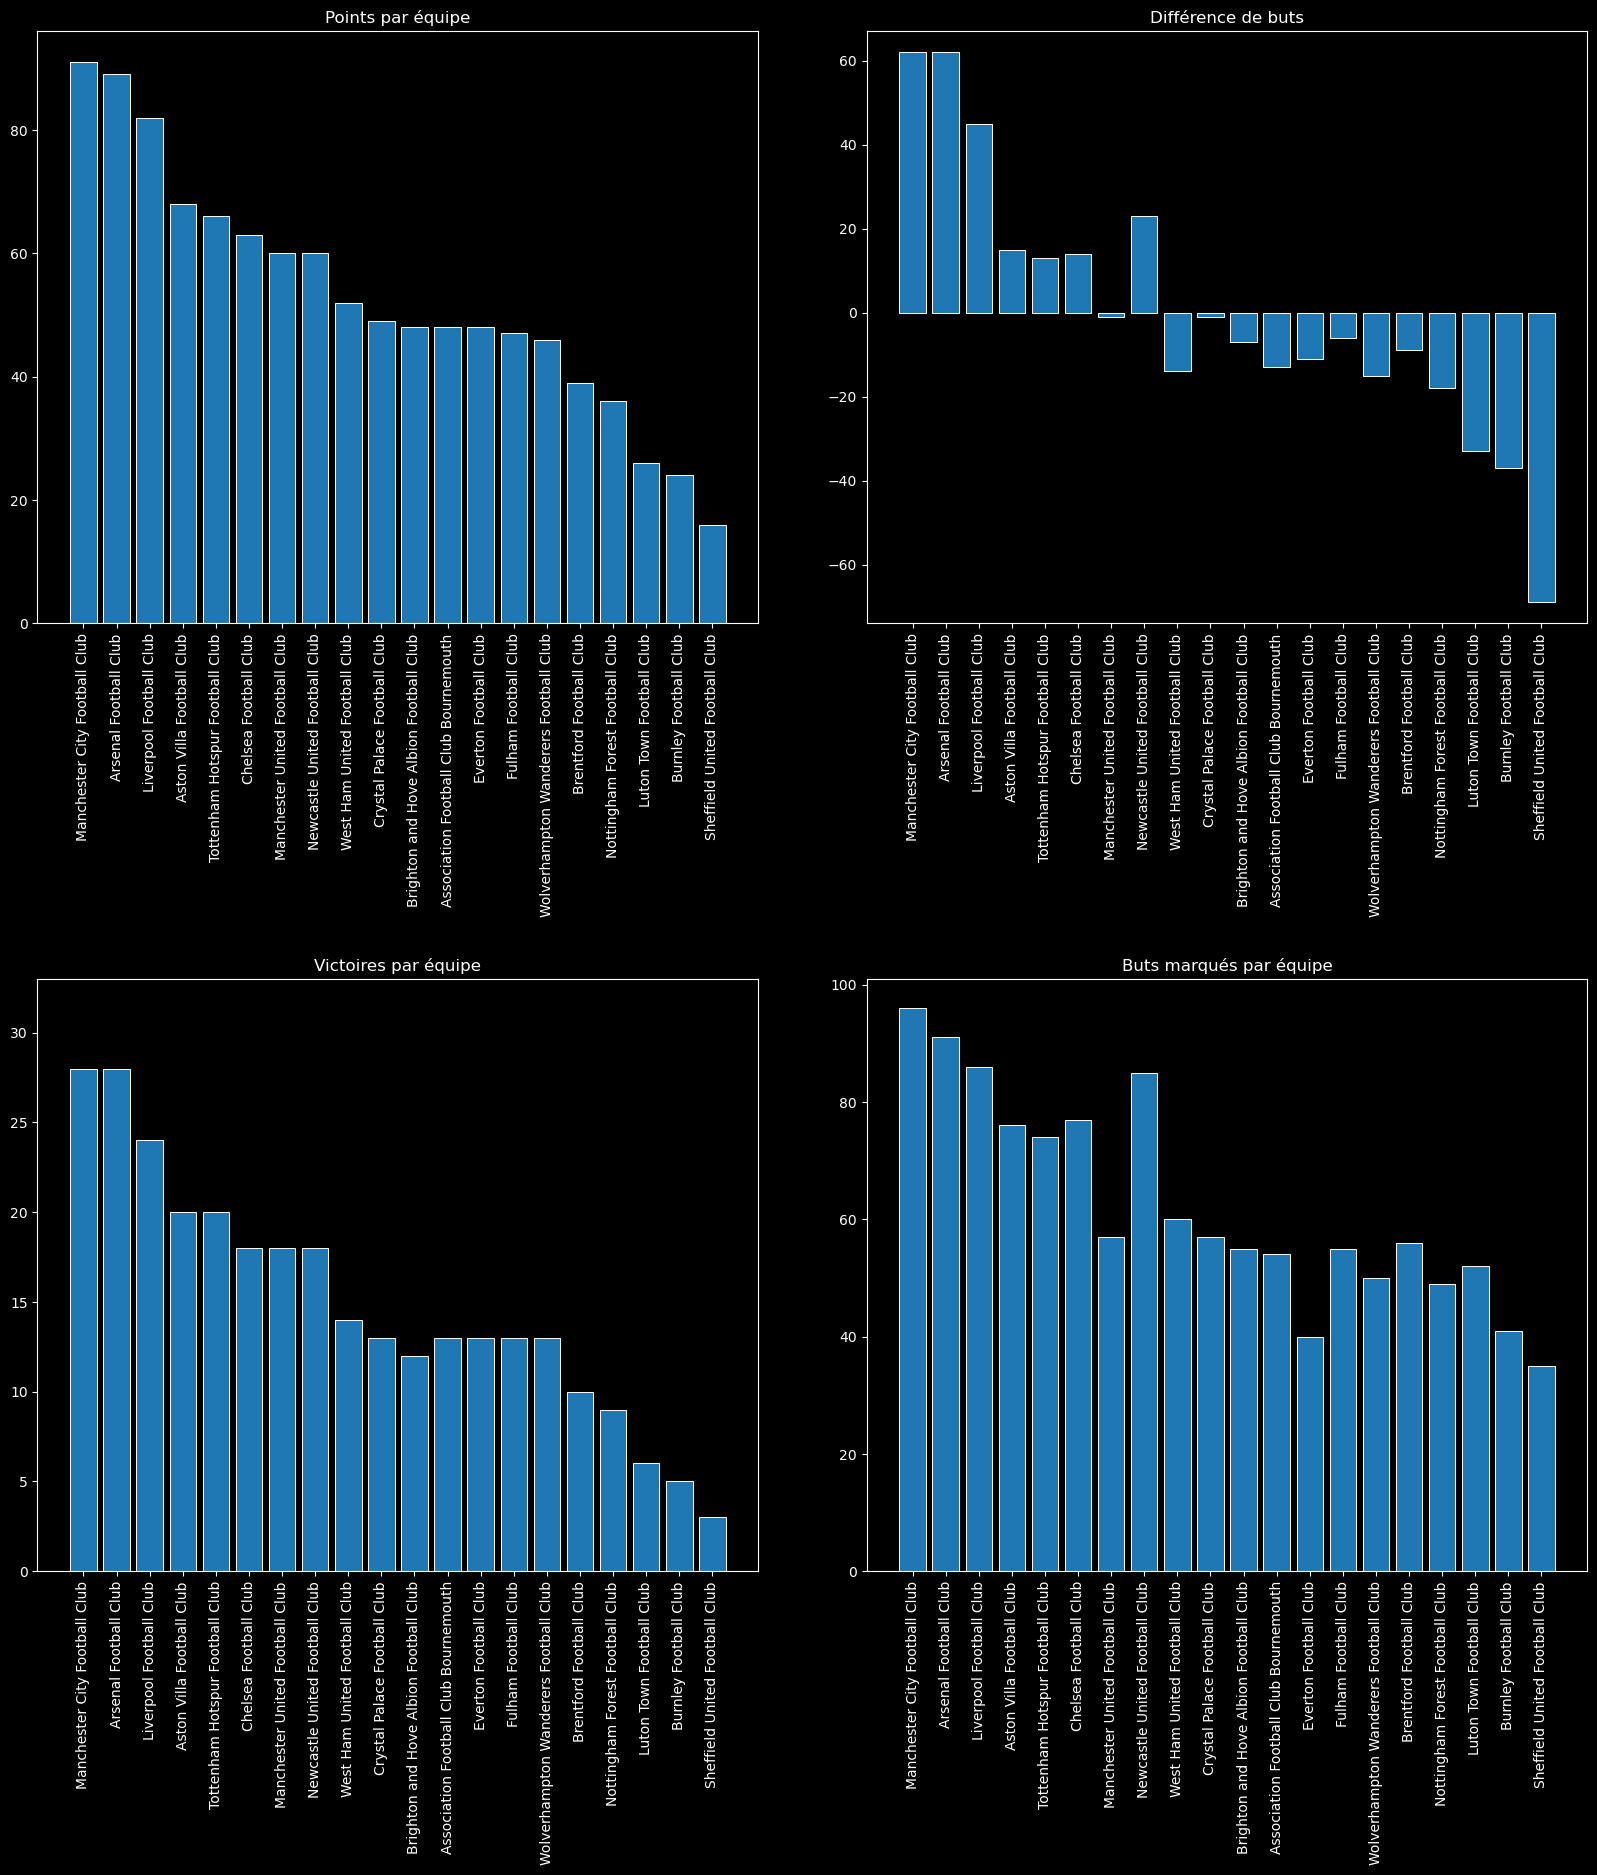

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.6, wspace=0.15)
fig.set_facecolor('black')

bars1 = ax[0, 0].bar(equipe_ligue, nombre_points_ligue, width=0.8, edgecolor="white", linewidth=0.7)
ax[0, 0].set_title('Points par équipe',color='white')
ax[0, 0].set_ylim(0, max(nombre_points_ligue) + 5)
ax[0, 0].set_xticklabels(equipe_ligue, rotation=90)
ax[0, 0].set_facecolor('black')

bars2 = ax[0, 1].bar(equipe_ligue, difference_buts_ligue, width=0.8, edgecolor="white", linewidth=0.7)
ax[0, 1].set_title('Différence de buts',color='white')
ax[0, 1].set_ylim(min(difference_buts_ligue) - 5, max(difference_buts_ligue) + 5)
ax[0, 1].set_xticklabels(equipe_ligue, rotation=90)
ax[0, 1].set_facecolor('black')

bars3 = ax[1, 0].bar(equipe_ligue, nombre_victoire_ligue, width=0.8, edgecolor="white", linewidth=0.7)
ax[1, 0].set_title('Victoires par équipe',color='white')
ax[1, 0].set_ylim(0, max(nombre_victoire_ligue) + 5)
ax[1, 0].set_xticklabels(equipe_ligue, rotation=90)
ax[1, 0].set_facecolor('black')

bars4 = ax[1, 1].bar(equipe_ligue, nombre_buts_pour_ligue, width=0.8, edgecolor="white", linewidth=0.7)
ax[1, 1].set_title('Buts marqués par équipe',color='white')
ax[1, 1].set_ylim(0, max(nombre_buts_pour_ligue) + 5)
ax[1, 1].set_xticklabels(equipe_ligue, rotation=90)
ax[1, 1].set_facecolor('black')

for a in ax.flat:
    a.tick_params(axis='y', colors='white')
    a.tick_params(axis='x', colors='white')
    for spine in a.spines.values():
        spine.set_edgecolor('white')

plt.show()


        _Graphics on team statistics_   

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20,) and arg 1 with shape (0,).

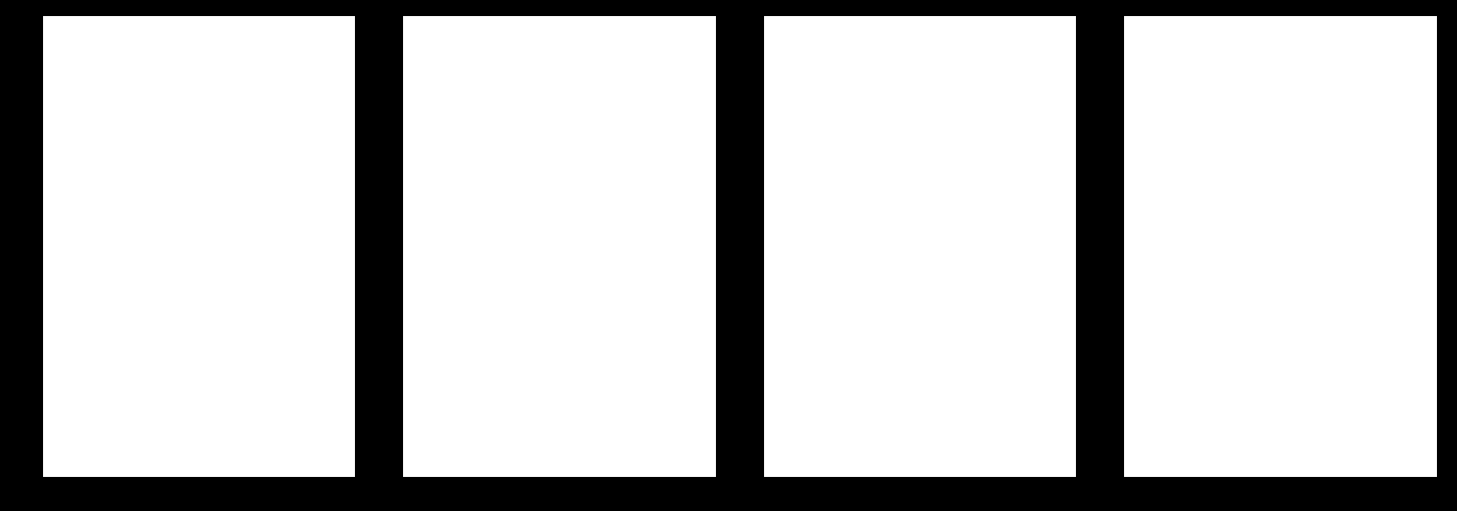

In [14]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
plt.subplots_adjust(hspace=0.6, wspace=0.15)
fig.set_facecolor('black')

bars1 = ax[0].bar(equipe_ligue, age_equipe_ligue, width=0.8, edgecolor="white", linewidth=0.7)
ax[0].set_title('Âge moyen par équipe', color='white')
ax[0].set_ylim(0, max(age_equipe_ligue) + 1)
ax[0].set_xticklabels(equipe_ligue, rotation=90)
ax[0].set_facecolor('black')

bars2 = ax[1].bar(equipe_ligue, nombre_joueurs_ligue, width=0.8, edgecolor="white", linewidth=0.7)
ax[1].set_title('Nombre de joueurs par équipe',color='white')
ax[1].set_ylim(0, max(nombre_joueurs_ligue) + 1)
ax[1].set_xticklabels(equipe_ligue, rotation=90)
ax[1].set_facecolor('black')

bars3 = ax[2].bar(equipe_ligue, valeur_joueurs_ligue, width=0.8, edgecolor="white", linewidth=0.7)
ax[2].set_title('Valeur de l équipe en millions',color='white')
ax[2].set_ylim(0, max(valeur_joueurs_ligue) + 100)
ax[2].set_xticklabels(equipe_ligue, rotation=90)
ax[2].set_facecolor('black')

bars4 = ax[3].bar(equipe_ligue, nationalite_joueurs_ligue, width=0.8, edgecolor="white", linewidth=0.7)
ax[3].set_title('Nombre de joueurs étrangers par équipe',color='white')
ax[3].set_ylim(0, max(nationalite_joueurs_ligue) + 5)
ax[3].set_xticklabels(equipe_ligue, rotation=90)
ax[3].set_facecolor('black')

for a in ax.flat:
    a.tick_params(axis='y', colors='white')
    a.tick_params(axis='x', colors='white')
    for spine in a.spines.values():
        spine.set_edgecolor('white')

plt.show()

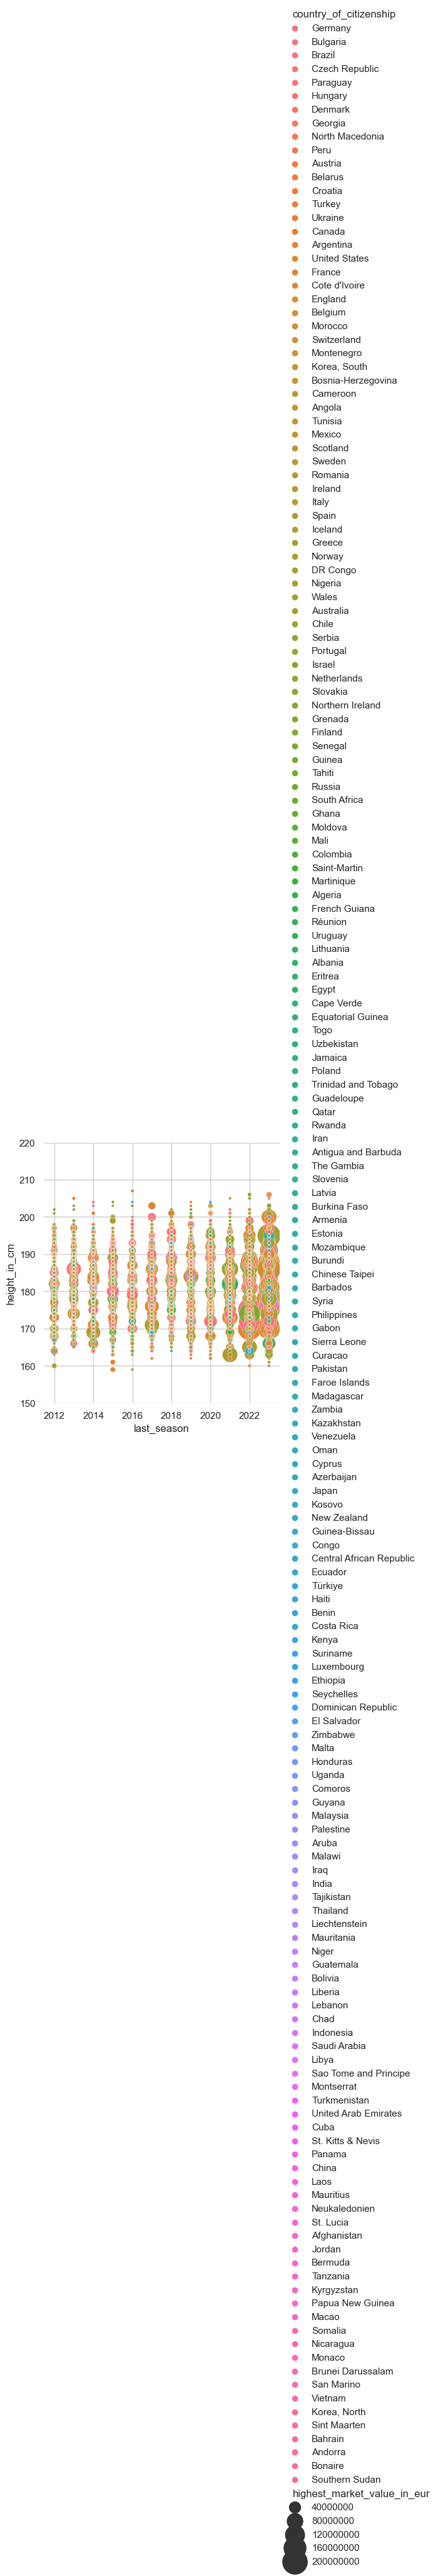

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=players,
    x="last_season", y="height_in_cm",
    hue="country_of_citizenship", size="highest_market_value_in_eur",
    sizes=(10, 200),
) 
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_ylim(150, 220)
g.despine(left=True, bottom=True)